## Comparing model results and final model selection


In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

In [9]:
import joblib 
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

**Loading the train features and lable**

In [24]:
val_features = pd.read_csv("/content/drive/MyDrive/val_features.csv")
val_labels = pd.read_csv("/content/drive/MyDrive/val_labels.csv", header=None)

test_features = pd.read_csv("/content/drive/MyDrive/test_features.csv")
test_labels = pd.read_csv("/content/drive/MyDrive/test_labels.csv",header=None)


In [13]:
models = {}

for mdl in ['LR', 'SVM','MLP', 'RF', 'GB']:
  models[mdl] = joblib.load("/content/drive/MyDrive/{}_model.json".format(mdl))

In [14]:
models

{'GB': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.01, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=500,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'LR': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001,

# **Evaluate models on validation sets**

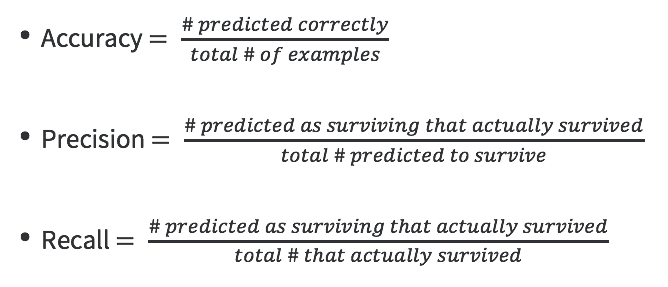

In [28]:
def evaluate_model(name, model, features, labels):
  start = time()
  pred = model.predict(features)
  end = time()
  accuracy = round(accuracy_score(labels,pred),3)
  precision = round(precision_score(labels,pred),3)
  recall = round(recall_score(labels,pred),3)
  print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency : {}ms'.format(name,accuracy,precision,recall,round(end-start)))

In [56]:
for name,mdl in models.items():
  evaluate_model(name,mdl, val_features, val_labels)

LR -- Accuracy: 0.775 / Precision: 0.712 / Recall: 0.646 / Latency : 0ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency : 0ms
MLP -- Accuracy: 0.775 / Precision: 0.719 / Recall: 0.631 / Latency : 0ms
RF -- Accuracy: 0.82 / Precision: 0.837 / Recall: 0.631 / Latency : 0ms
GB -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency : 0ms


# **Evaluate best model for test set**

In [57]:
evaluate_model("Random Forest", models['RF'], test_features, test_labels)

Random Forest -- Accuracy: 0.799 / Precision: 0.857 / Recall: 0.632 / Latency : 0ms


In [54]:
pred = models['RF'].predict(test_features)
pd.DataFrame(pred).to_csv("/content/drive/MyDrive/prediction.csv",index=False, header=["Predicition"])

In [55]:
prediction = pd.read_csv("/content/drive/MyDrive/prediction.csv")
prediction

,Predicition
0,0
1,0
2,0
3,1
4,0
...,...
174,0
175,1
176,0
177,1
